# Importing Libraries

In [1]:
import pandas as pd  #data manipulation library
import seaborn as sns #visualization library, for statistical visualization
import matplotlib.pyplot as plt #another visualization libray
from sklearn.cluster import KMeans #Clustering library from sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/diami/OneDrive/Documents/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

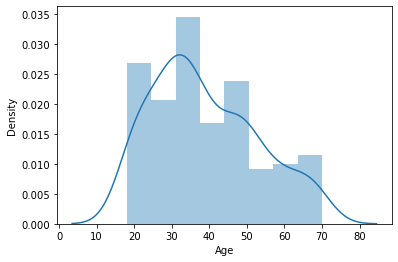

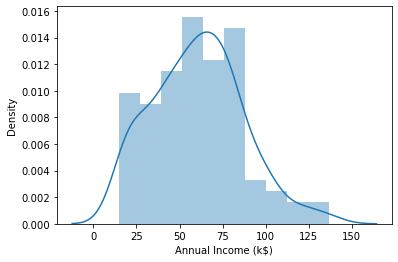

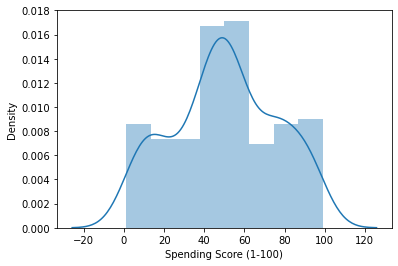

In [6]:
#creating a for loop to create histograms for each numerical variables, avoiding repetition of code

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

In [7]:
#sns.kdeplot(df['Annual Income (k$)'], shade = True, hue = df['Gender'] ); #kdeplot allow us to bring different parameter like shade and hue(break by dimension)

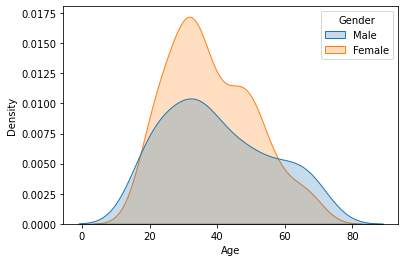

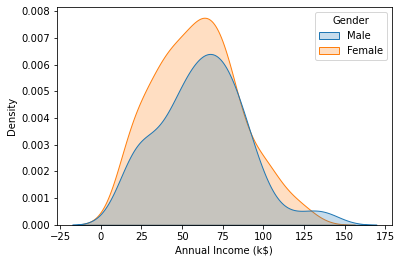

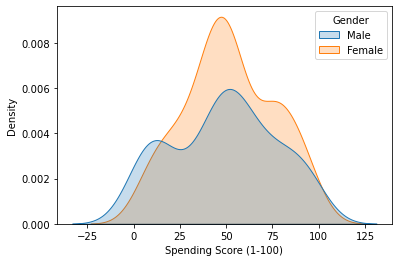

In [8]:

columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i], shade = True, hue = df['Gender'] )

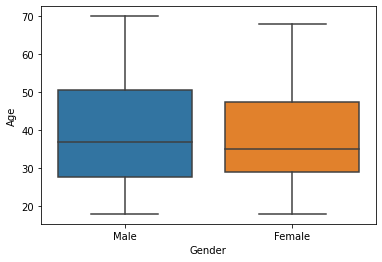

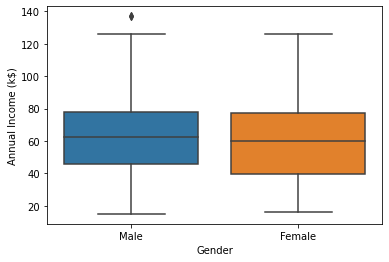

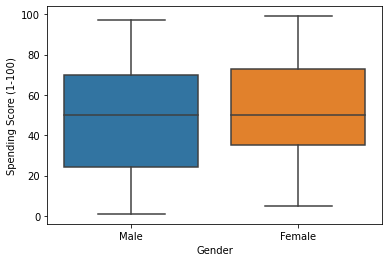

In [9]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data = df, x = 'Gender', y = df[i] )

In [10]:
df['Gender'].value_counts(normalize = True) #56% female and 44% male

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

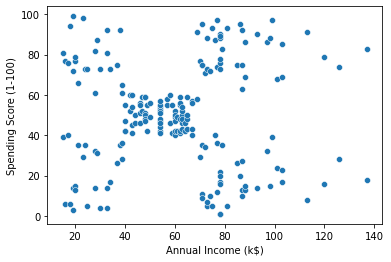

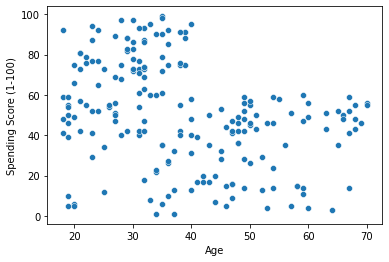

In [11]:
# Scatterplot
columns = ['Annual Income (k$)', 'Age']
for i in columns:
    plt.figure()
    sns.scatterplot(data = df, x = df[i] , y = 'Spending Score (1-100)');

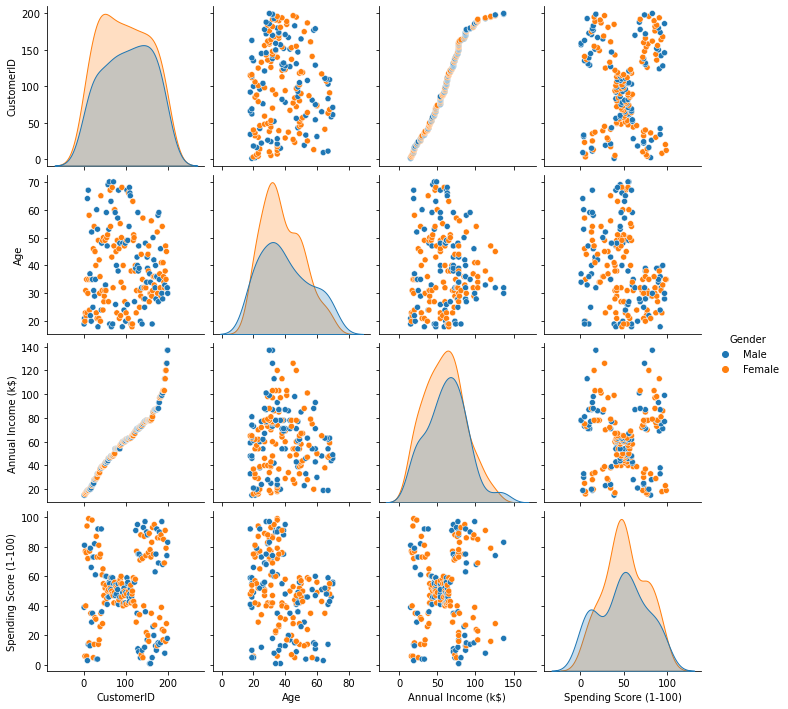

In [12]:
#df = df.drop('CustomerID', axis =1 )
sns.pairplot(df, hue = 'Gender')

In [13]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [14]:
#correlation using table
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

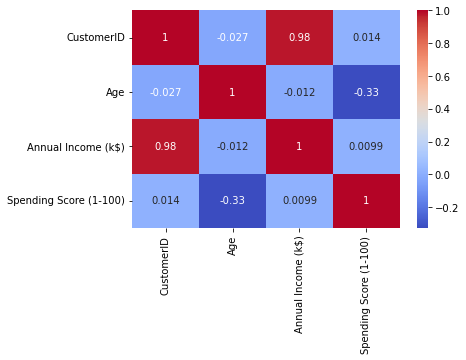

In [15]:
#correlation using heatmap
sns.heatmap(df.corr(), annot=True, cmap ='coolwarm')

# Clustering - Univariate , Bivariate 

In [16]:
clustering1 = KMeans(n_clusters = 3) #n_clusters determine using elbow method down below

In [17]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [18]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [19]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [20]:
#how many of our customer fall in each cluster
df['Income Cluster'].value_counts()

2    90
1    74
0    36
Name: Income Cluster, dtype: int64

In [21]:
#how many clusters do we actually need , Doing the elbow method for number of clusters
clustering1.inertia_

23517.33093093092

In [22]:
inertia_scores=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
inertia_scores

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5081.484660267269,
 3949.275613275612,
 2831.296031746034,
 2230.430554412907,
 1743.4772727272732]

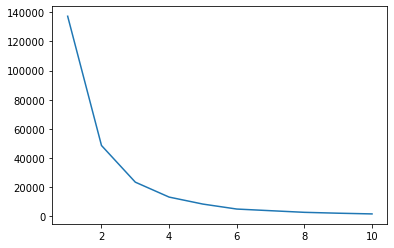

In [23]:
plt.plot(range(1,11), inertia_scores) #looks like the elbow start in 3, so n_clusters = 3

In [24]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [25]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


In [26]:
#Bivariate Clustering

In [27]:
#clustering using Annual Income and Spending Score

In [28]:
clustering2 = KMeans( n_clusters = 5) 
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,4


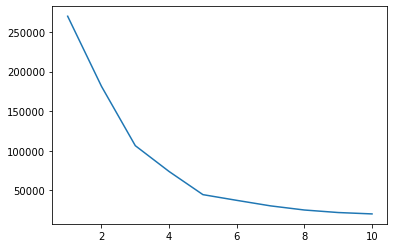

In [29]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2) #looks like the elbow start in 5, so n_clusters = 5

In [30]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

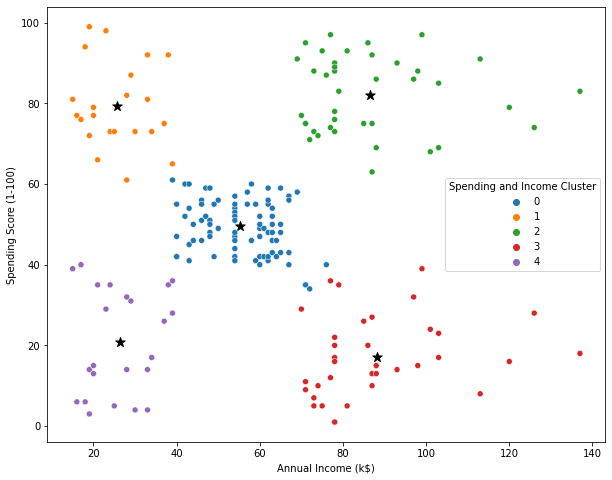

In [31]:
plt.figure(figsize = (10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y= 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'tab10')

In [32]:
#Looks like cluster 3 is the ideal cluster with high income and high spending score
# From the crosstab we can see that 

In [33]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [34]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean() #we can see the average age, income and spending score of each income

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [35]:
#clustering using Age and Spending Score

In [36]:
clustering3 = KMeans(n_clusters =4) 
clustering3.fit(df[['Age', 'Spending Score (1-100)']])
df['Spending and Age Cluster'] = clustering3.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Spending and Age Cluster
0,1,Male,19,15,39,1,4,0
1,2,Male,21,15,81,1,1,1
2,3,Female,20,16,6,1,4,3
3,4,Female,23,16,77,1,1,1
4,5,Female,31,17,40,1,4,0


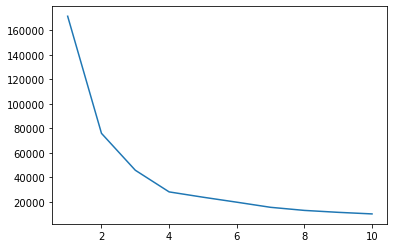

In [37]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(df[['Age', 'Spending Score (1-100)']])
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3) #looks like the elbow start in 4, so n_clusters = 4

In [38]:
centers2 = pd.DataFrame(clustering3.cluster_centers_)
centers2.columns = ['x', 'y']

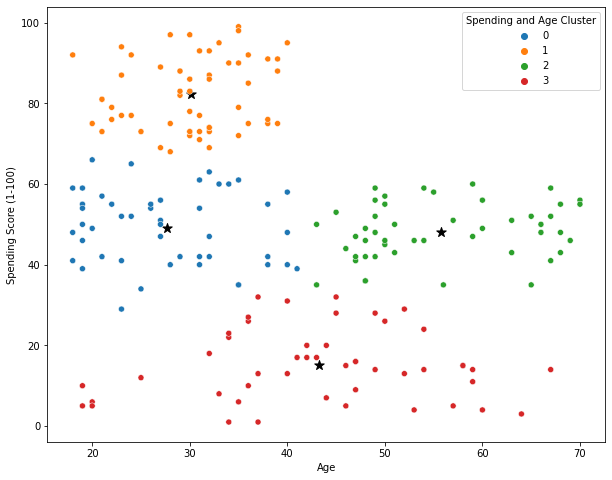

In [39]:
plt.figure(figsize = (10,8))
plt.scatter(x=centers2['x'],y=centers2['y'],s=100,c='black',marker='*')
sns.scatterplot(data = df, x = 'Age', y= 'Spending Score (1-100)', hue = 'Spending and Age Cluster', palette = 'tab10');